## Notebook for loading the constellation pictures to be used

In [1]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from dataUtils import *
%matplotlib inline

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
x, y, z, k = loadConstellations()

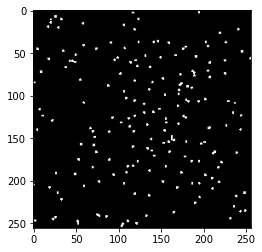

In [4]:
plt.imshow(x[370])

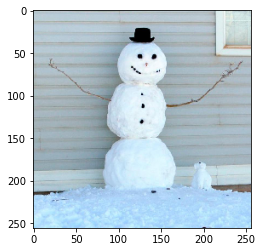

In [66]:
out = getOriginalForConstellation(y[300], z, k)
plt.imshow(out)

In [51]:
#selectedDataset = "limitedSet" #Select the constellation dataset
#pictureTypes = ["final_easy"]  #Select, which type of pictures are used

"""
Function for loading the constellation images (dots on black background) with original pictures.
Each constellation has multiple pictures with or without added noise.

Arguments:
 selectedDataset - can be "limitedSet" - handpicked ~40 constellation
                          "fullSet" - all the constellations
 pictureTypes - list defining what sort of constellations are loaded
                "dotted" - only constellation without noise
                "final_easy" - constellation with little noise
                "final_hard" - constellations with more noise
                "outline" - dots with added lines between them

 pictureSize - Size to resize images to after they are read from disk. Defaults to (256, 256).
 
Returns:
  4 numpy arrays
  constellationPictures - the pictures of constellations
  constellationLabels - object IDs of constellations
  originalPictures - the original pictures from which the constellations are created
  originalLabels - the object IDs of original pictures

"""
def loadConstellations(selectedDataset="limitedSet", pictureTypes=["final_easy"], pictureSize=(256,256)):

    originalPictures = []
    originalLabels = []
    constellationPictures = []
    constellationLabels = []

    constellationObjectIds = os.listdir(os.path.join(".","constellationImages",selectedDataset))
    #For each constellation load all the picture from given types of picture
    #Store also the object ID for each loaded picture
    #Also load the original picture and store its object ID for later comparison
    for constellationObjectId in constellationObjectIds:
        for pictureType in pictureTypes:
            constellationPictureNames = os.listdir(os.path.join(".","constellationImages",selectedDataset,
                                                               constellationObjectId, pictureType))
            for constellationPictureName in constellationPictureNames:
                #Load image
                img = image.load_img(os.path.join(".","constellationImages",
                                                  selectedDataset,constellationObjectId, 
                                                  pictureType, constellationPictureName), 
                                     target_size=pictureSize)
                #Convert to np array and add to list
                constellationPictures+=[np.array(img)]
                constellationLabels+=[constellationObjectId]
        #Load the original picture
        originalPictureName = glob.glob(os.path.join(".","constellationImages",
                                      selectedDataset, constellationObjectId, 
                                                     "original", "*"))
        img = image.load_img(originalPictureName[0], 
                         target_size=(256, 256))
        originalPictures+=[np.array(img)]
        originalLabels+=[constellationObjectId]

    return np.array(constellationPictures), np.array(constellationLabels), np.array(originalPictures), np.array(originalLabels)

In [57]:
"""
Function to find the original picture of chosen constellation by object ID

Arguments:
objectID - constellations ID
originalPictures - list containing the original pictures
originalLabels - list containing the IDs of original pictures, in same order as originalPictures

"""
def getOriginalForConstellation(objectID, originalPictures, originalLabels):
    pictureIndx = np.where(originalLabels==objectID)[0][0]
    return originalPictures[pictureIndx]

In [52]:
X, Y, origX, origY = loadConstellations()

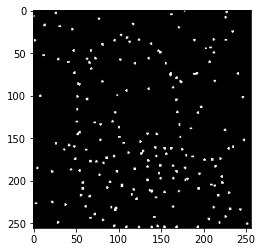

In [60]:
plt.imshow(X[232])

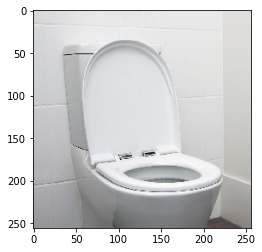

In [58]:
plt.imshow(getOriginalForConstellation(Y[232], origX, origY))

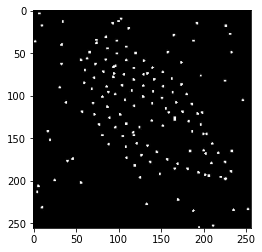

In [48]:
plt.imshow(X[0])

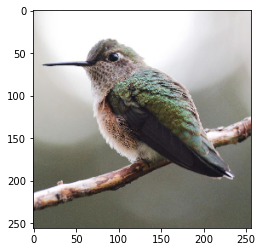

In [49]:
plt.imshow(np.array(origX[0]))

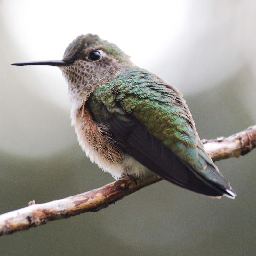

In [13]:
origX[0]

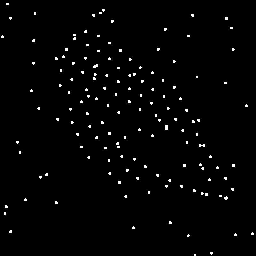

In [12]:
X[0]

In [19]:
if(1!=1):
    print("A")

In [3]:
home = os.getcwd()
home

'C:\\Users\\Heigo Ers\\Desktop\\NeuralNets\\project'

In [4]:
#os.chdir()

In [5]:
glob.glob("*")

['constellationImages', 'loadData.ipynb', 'README.md']

In [6]:
glob.glob(os.path.join(".","constellationImages","limitedSet", "*"))

['.\\constellationImages\\limitedSet\\object_196',
 '.\\constellationImages\\limitedSet\\object_201',
 '.\\constellationImages\\limitedSet\\object_206',
 '.\\constellationImages\\limitedSet\\object_211',
 '.\\constellationImages\\limitedSet\\object_225',
 '.\\constellationImages\\limitedSet\\object_229',
 '.\\constellationImages\\limitedSet\\object_230',
 '.\\constellationImages\\limitedSet\\object_234',
 '.\\constellationImages\\limitedSet\\object_243',
 '.\\constellationImages\\limitedSet\\object_244',
 '.\\constellationImages\\limitedSet\\object_248',
 '.\\constellationImages\\limitedSet\\object_256',
 '.\\constellationImages\\limitedSet\\object_263',
 '.\\constellationImages\\limitedSet\\object_266',
 '.\\constellationImages\\limitedSet\\object_322',
 '.\\constellationImages\\limitedSet\\object_324',
 '.\\constellationImages\\limitedSet\\object_338',
 '.\\constellationImages\\limitedSet\\object_339',
 '.\\constellationImages\\limitedSet\\object_341',
 '.\\constellationImages\\limit

In [5]:
glob.glob(os.path.join(".","constallationImages","limitedSet","*"))

[]